# Face perception using FaceNet
Incremental models using FaceNet (binary face regressor, face vs. no-face). </br>
Visual and speech covariates (brightness, landscape, building, speech, people) are added incrementally.

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from tools.create import create_incremental_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = ['any_faces', 'brightness', 'building', 'landscape', 'speech', 'people']

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create incremental models and dump to json file

In [6]:
incremental_models = create_incremental_models(predictors, confounds)

Dataset: Life, Predictors: ['any_faces', 'brightness'] Not all named predictors could be found for the specified runs.
Dataset: ParanoiaStory, Predictors: ['any_faces', 'brightness'] Not all named predictors could be found for the specified runs.
Dataset: Life, Predictors: ['any_faces', 'brightness', 'building'] Not all named predictors could be found for the specified runs.
Dataset: ParanoiaStory, Predictors: ['any_faces', 'brightness', 'building'] Not all named predictors could be found for the specified runs.
Dataset: Life, Predictors: ['any_faces', 'brightness', 'building', 'landscape'] Not all named predictors could be found for the specified runs.
Dataset: ParanoiaStory, Predictors: ['any_faces', 'brightness', 'building', 'landscape'] Not all named predictors could be found for the specified runs.
Dataset: studyforrest, Predictors: ['any_faces', 'brightness', 'building', 'landscape', 'speech'] Not all named predictors could be found for the specified runs.
Dataset: Life, Predicto

In [7]:
filename = Path('models') / 'facenet_incremental.json'

In [8]:
#dump_collection(incremental_models, str(filename))

In [9]:
incremental_models = load_collection(str(filename))

## Generate reports

In [10]:
for (pred, dataset, task), model in flatten_collection(incremental_models):
    model.generate_report(run_id=model.runs[0])

In [11]:
incremental_models['any_faces']['Raiders']['raiders'].plot_report()

'OK'

## Inspect regressors

In [7]:
df = _extract_regressors(incremental_models)

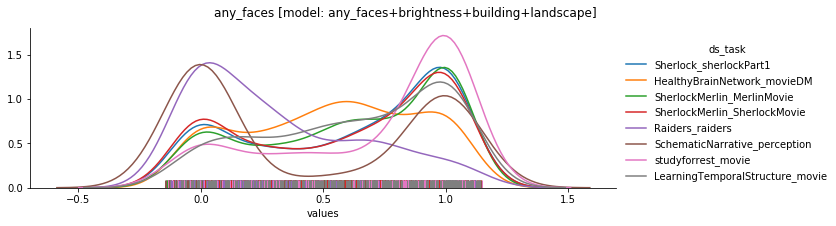

In [8]:
plot_regressor_distribution(df=df,
                            predictors=['any_faces'],
                            models=['any_faces+brightness+building+landscape'],
                            split_by='hue', color=None, aspect=3, hist=None, rug=True)

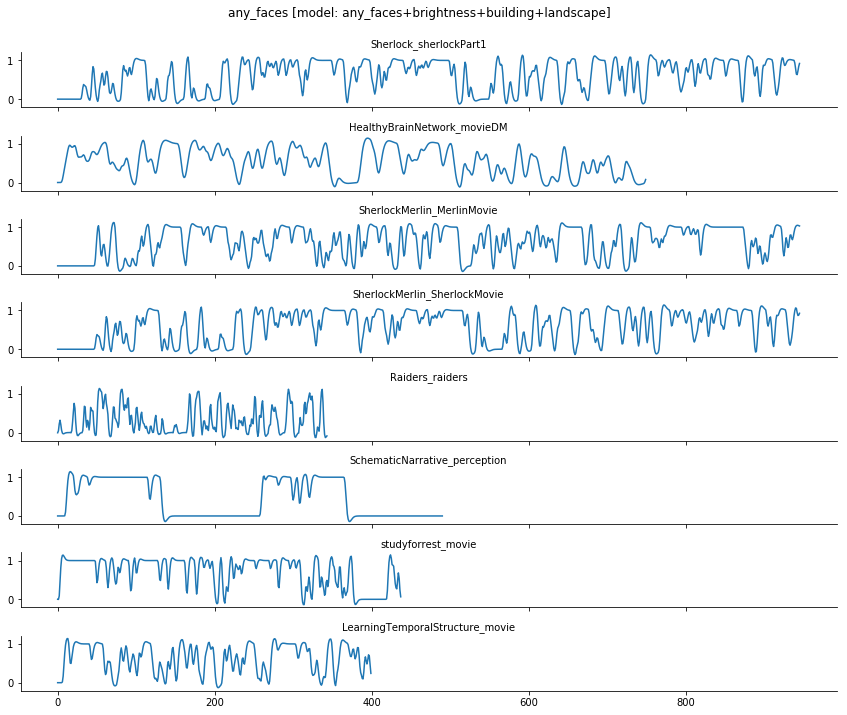

In [9]:
plot_regressor_timeseries(df=df,
                            predictors=['any_faces'],
                            models=['any_faces+brightness+building+landscape'],
                            split_by='row', height=1.2, aspect=10)

In [10]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

/home/roberta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


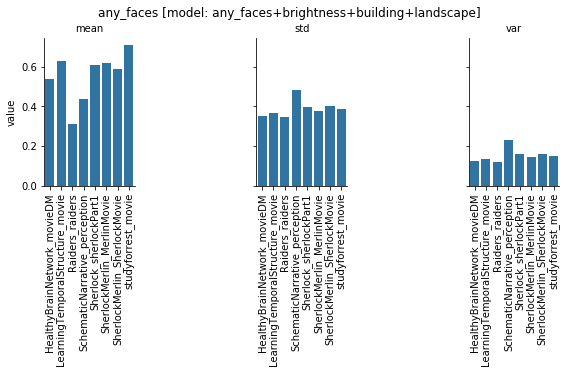

In [11]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'], 
             predictors=['any_faces'],
             models=['any_faces+brightness+building+landscape'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [10]:
for (pred, dataset, task), model in flatten_collection(incremental_models):
    if model.get_status()['status'] == 'DRAFT':
        model.compile()

## Results

In [11]:
flat_models = flatten_collection(incremental_models)

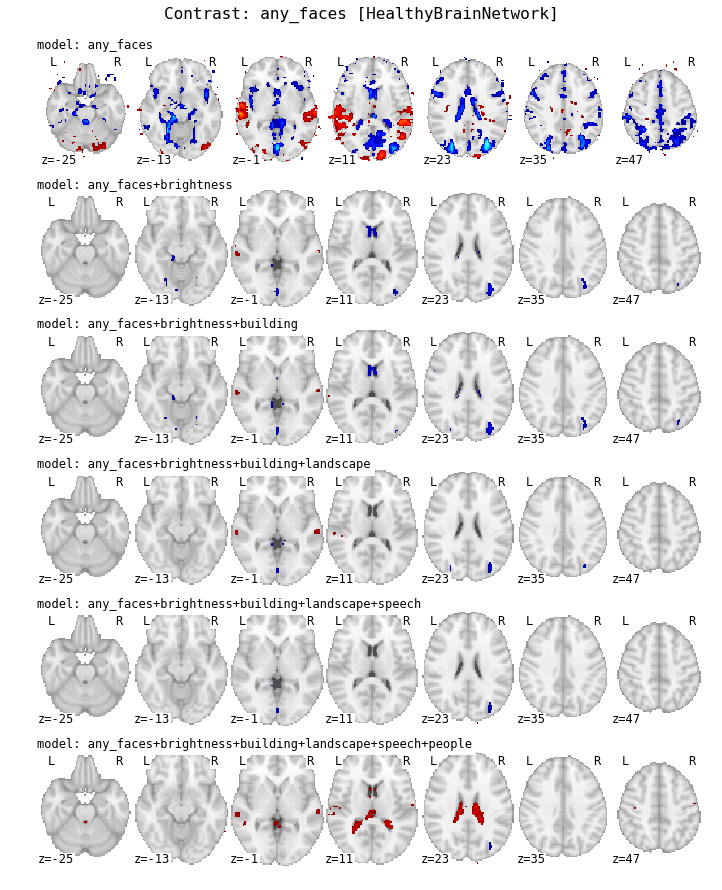

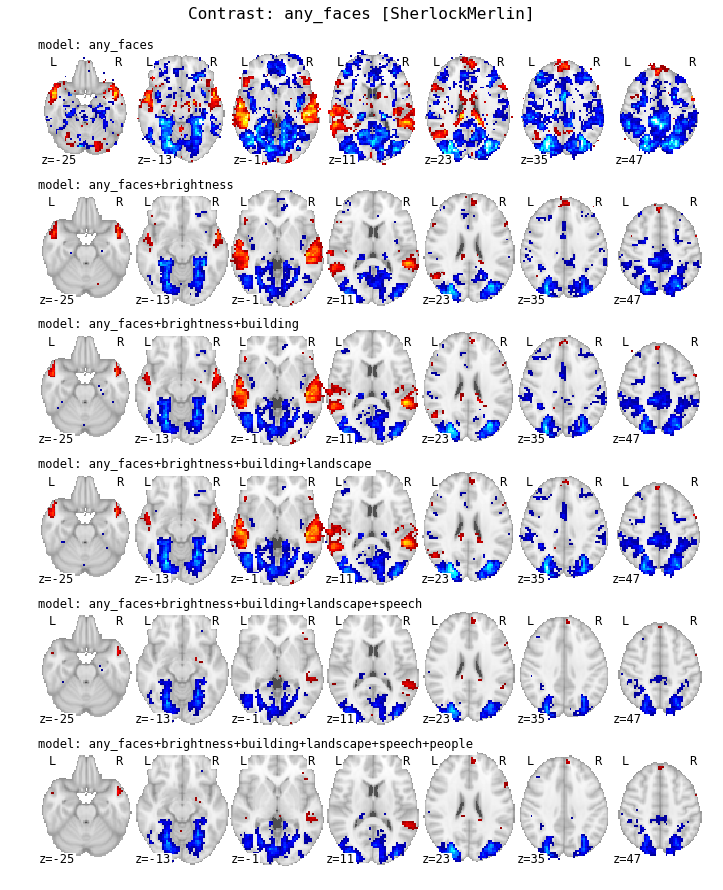

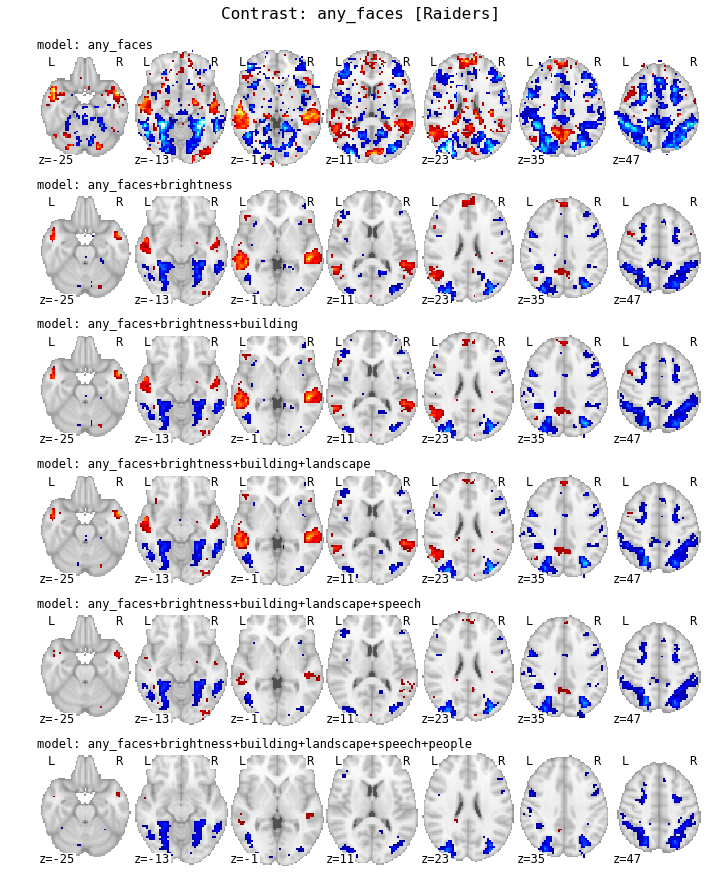

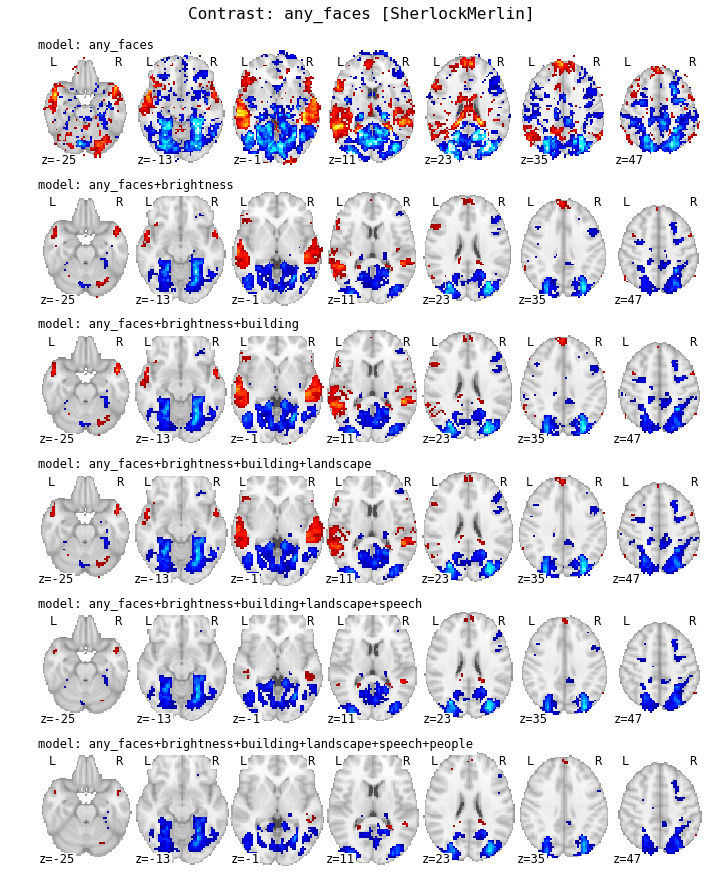

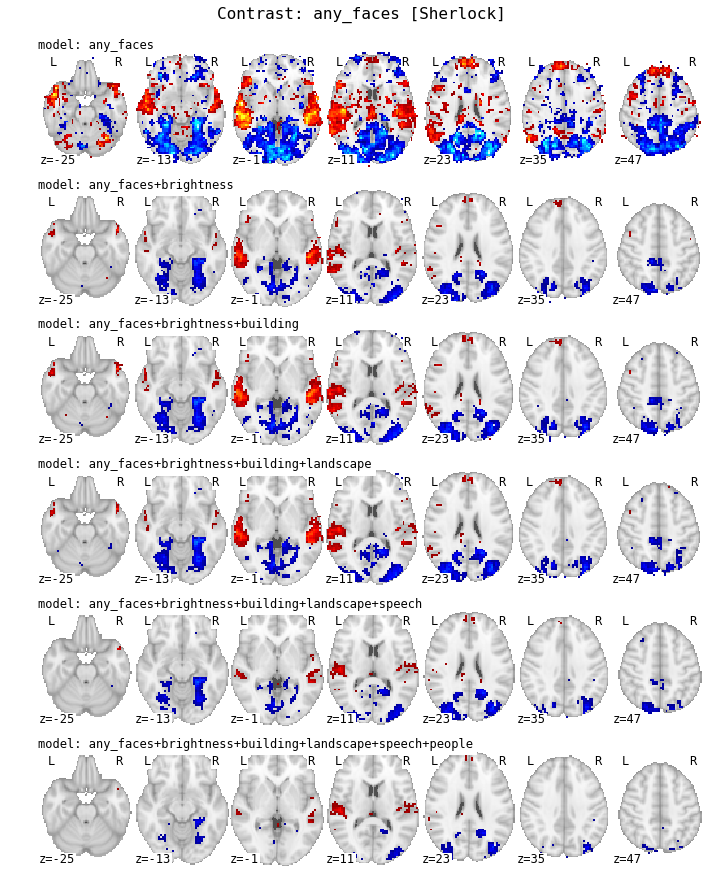

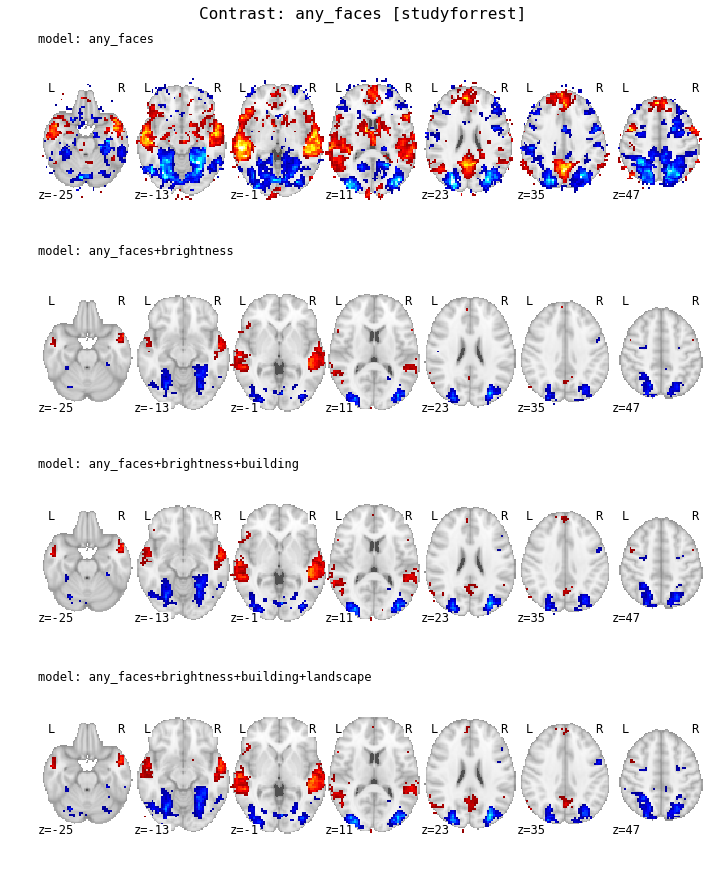

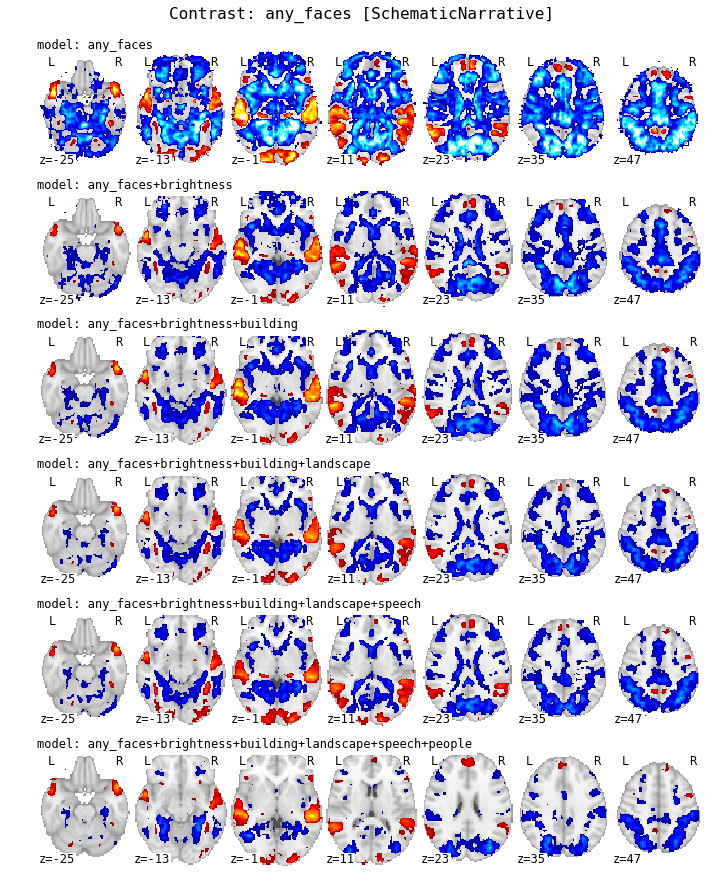

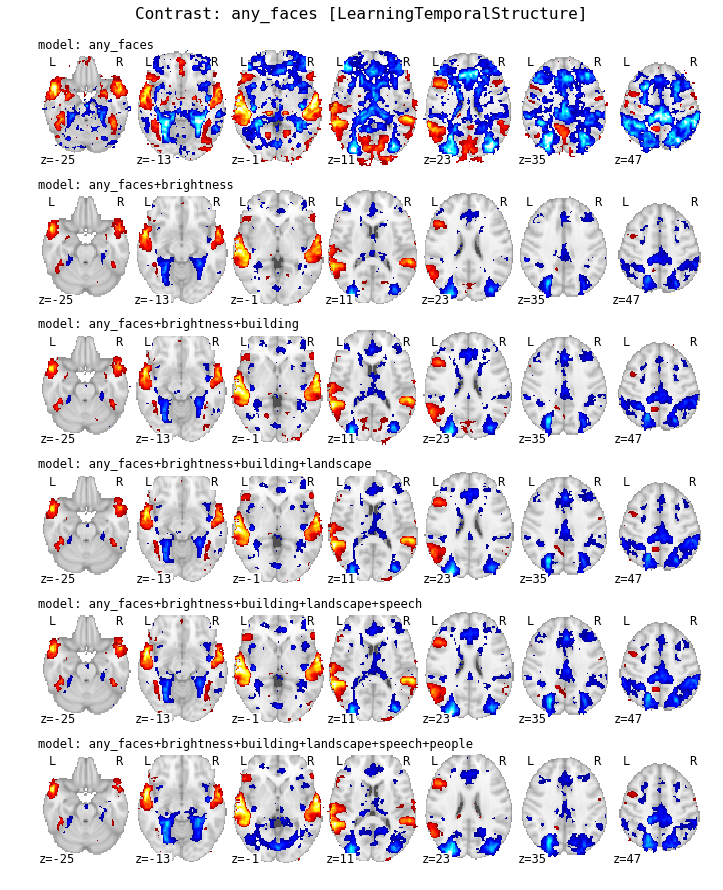

In [15]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_dataset(flat_models,
                         contrasts=['any_faces'],
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)

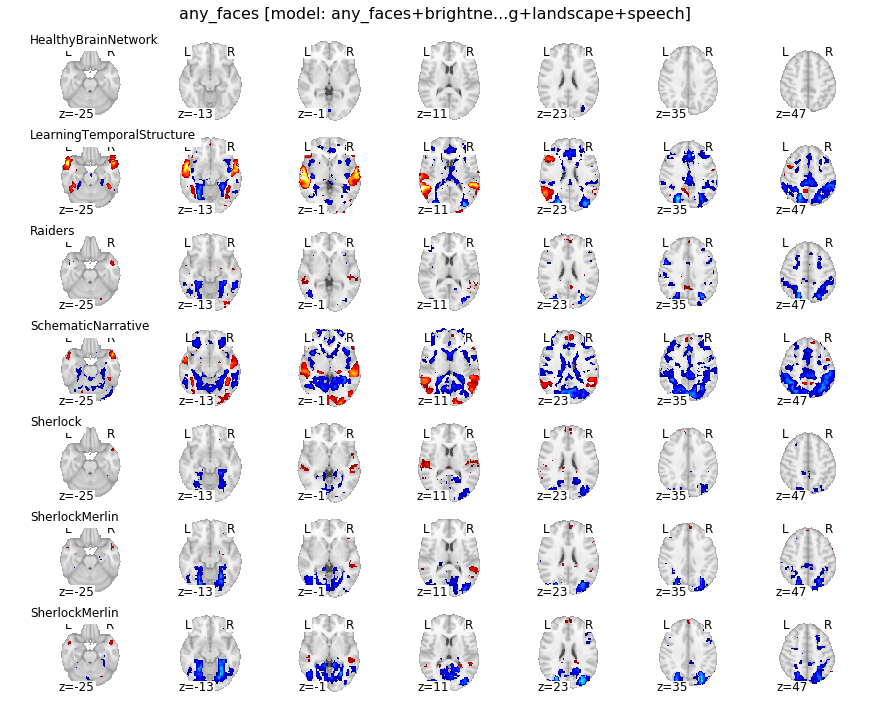

In [13]:
plot_contrast_by_analysis(flat_models, contrasts=['any_faces'],
                          models=['any_faces+brightness+building+landscape+speech'],
                          vmax=10, draw_cross=True,
                          figsize=(15,12), colorbar=False,
                          threshold=1.96)

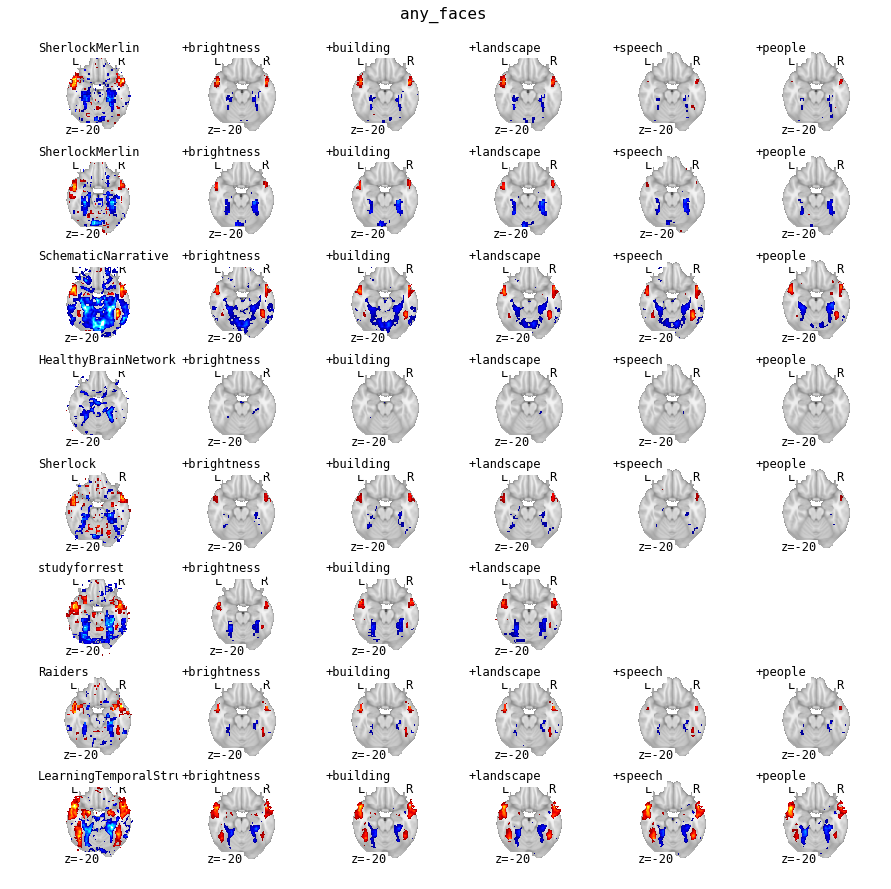

In [22]:
plot_analysis_grid(flat_models, contrasts=['any_faces'], vmax=10,
                    display_mode='z', colorbar=False,
                    cut_coords = [-20], draw_cross=True, figsize=(15,15), threshold=1.96)

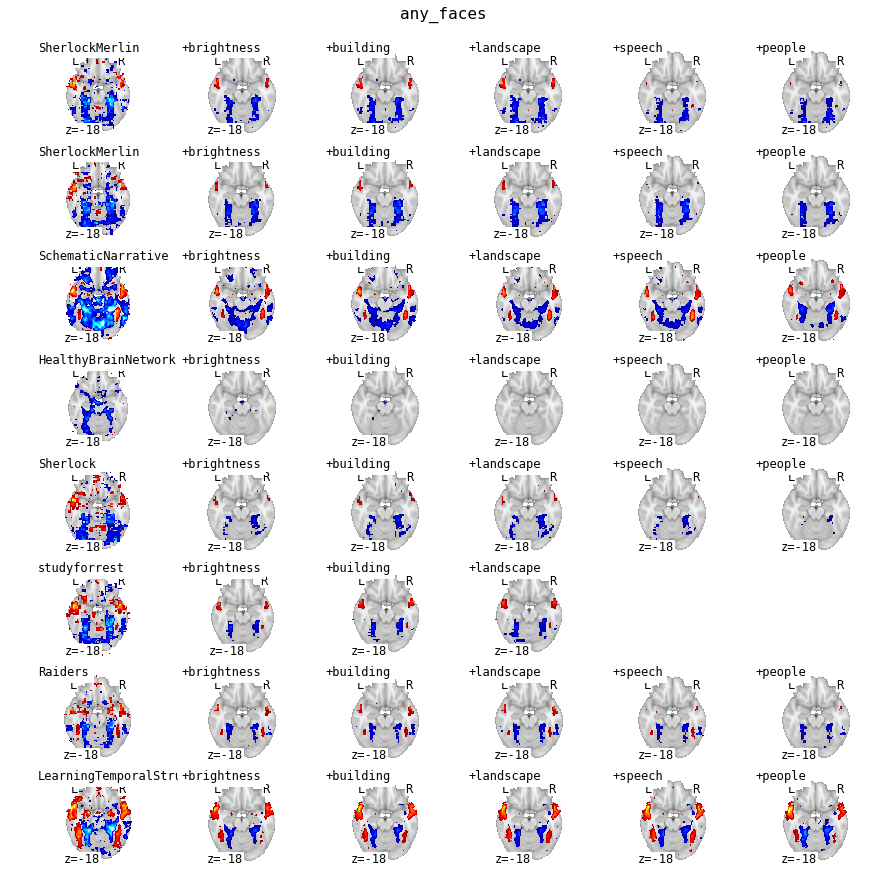

In [23]:
plot_analysis_grid(flat_models, contrasts=['any_faces'], vmax=10,
                    display_mode='z', colorbar=False,
                    cut_coords = [-18], draw_cross=True, figsize=(15,15), threshold=1.96)

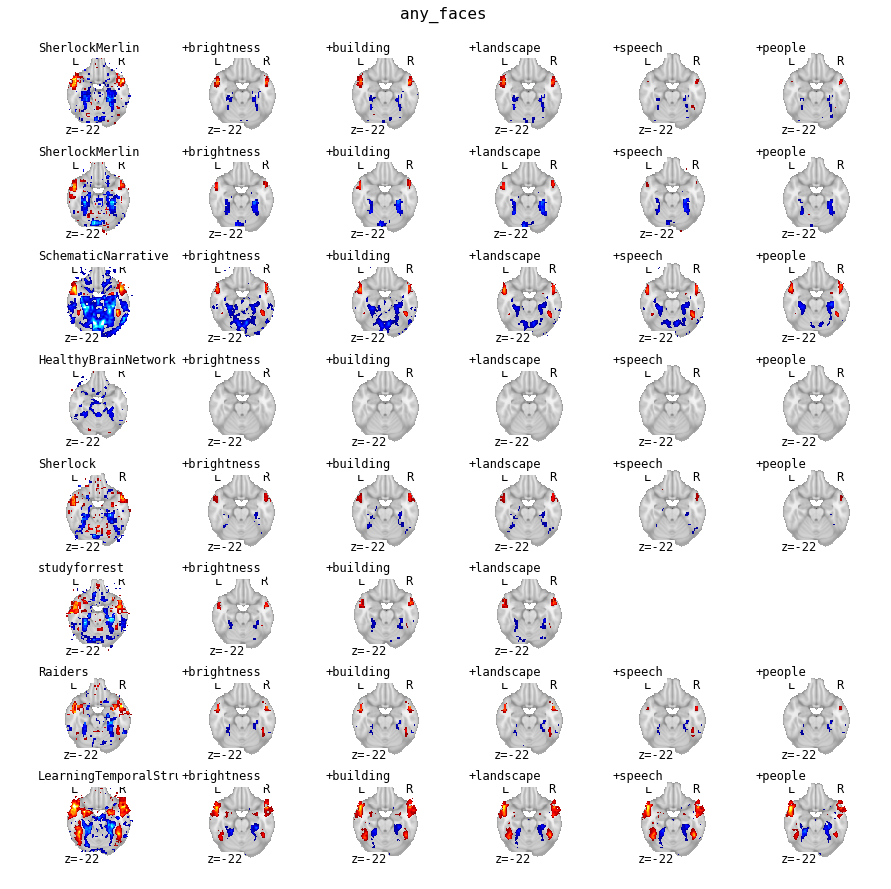

In [25]:
plot_analysis_grid(flat_models, contrasts=['any_faces'], vmax=10,
                    display_mode='z', colorbar=False,
                    cut_coords = [-22], draw_cross=True, figsize=(15,15), threshold=1.96)